**линейный классификатор**

правило Розенблатта  

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
from time import time

def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)

In [3]:
n_samples = 500
n_clst = 2 # количество кластеров

X,y = make_blobs( 
        n_samples=n_samples,
        centers=n_clst,  
        random_state=get_seed(),
        cluster_std=[1.0, 2.5,]
    )

In [4]:
X.shape, y.shape

((500, 2), (500,))

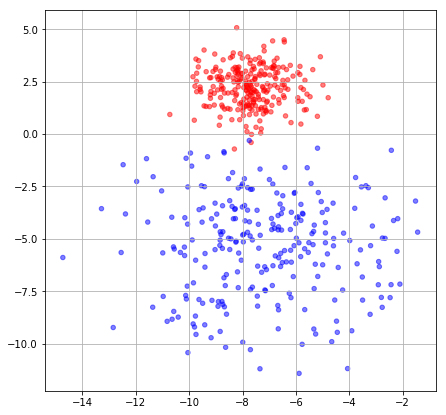

In [5]:
plt.figure(figsize=(7,7))
plt.scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
plt.grid()
plt.show()

---

In [6]:
# биннаризация X

In [7]:
n=50
b = np.vstack([ np.linspace(X[:,j].min()-1,X[:,j].max()+1,n) for j in range(X.shape[1]) ])

In [8]:
# b

In [9]:
Xp = np.hstack([
    np.hstack([ ( (b[j,i]<X[:,j])&(X[:,j]<b[j,i+1]) ).astype(int).reshape(X.shape[0],1) 
    for i in range(b.shape[1]-1) ])
    for j in range(X.shape[1])
])

Xp.shape

(500, 98)

In [10]:
# Xp

---

In [11]:
# инициализация параметров
W = np.random.normal(loc=0.0, scale=0.1, size=Xp.shape[1])
W 

array([-1.97686279e-01, -1.91522712e-01, -8.05953302e-02, -2.38653524e-01,
       -1.30094514e-01, -1.78585446e-01,  2.95421996e-03,  1.36601157e-01,
        1.18015526e-01, -1.21765157e-01,  5.59701350e-02,  1.35091970e-02,
        1.33089873e-01, -3.11796991e-01, -9.92829020e-02,  9.84440084e-02,
       -4.84935569e-02,  1.06610089e-01,  2.92250510e-02, -2.71234435e-02,
       -2.20678741e-04,  1.70113169e-02, -3.82541984e-02, -1.22950646e-01,
       -3.65588251e-02,  5.17726850e-02,  1.01796363e-01,  2.63399906e-02,
       -1.08976736e-01, -3.43420739e-02, -9.00733010e-02,  1.92101756e-01,
        1.17469278e-01,  2.42063127e-02, -1.56825295e-01,  9.73945604e-02,
       -1.54269575e-01,  2.35764633e-01, -2.15294856e-02, -4.73023251e-02,
        6.84328854e-02,  1.56391028e-03, -1.00467971e-01, -1.85734726e-01,
        2.00293748e-01,  6.50366954e-02,  1.52462620e-01,  3.03441391e-02,
        2.56466662e-02,  5.07993599e-02, -5.49947384e-02,  1.07856744e-01,
       -7.97881542e-02,  

In [12]:
def loss(x,w,y): return -x.dot(w)*y    

In [13]:
MAX_ITER = 20 # максимальное число циклов обучения

# ERROR_BOUND = -Xp.shape[0]*0.99 # порог ошибки (количество ошибок)
ERROR_BOUND = -3.1

a=0.7 # скорость обучения
l = 0.5 # темп "забывания"

er_hist = [] # история ошибки

In [14]:
q = loss(Xp,W,y).sum()
er_hist.append( q )

In [15]:
# метод стохастического градиентного спуска (SGD)
stop=False
for i in range(MAX_ITER):
    if stop: break
    for j in np.random.permutation(Xp.shape[0]):
        
        if er_hist[-1] < ERROR_BOUND: # проверяем достижение порога
            print( 'error bound on epoch %i step %i: %f'%(i,j,er_hist[-1]) )
            stop=True
            break

        xj,yj = Xp[j,:],y[j]
        
        r = (xj.dot(W)>0.5).astype(int) # выход
        W = W - a * xj.T.dot(r-y[j])
        
        # значение ф-ции потери
        qj = loss(xj,W,yj)
        q = l*qj +(1-l)*q
        er_hist.append( q )  
        

In [16]:
print(W)
print(len(er_hist),er_hist[-1],min(er_hist))

[-0.19768628 -0.19152271 -0.08059533  0.46134648 -0.13009451 -0.17858545
  0.00295422  0.13660116  0.11801553 -0.12176516  0.75597013  0.0135092
  0.13308987  0.38820301  0.6007171   0.79844401 -0.04849356  0.10661009
  0.72922505  0.67287656  0.69977932  0.71701132  0.6617458  -0.12295065
 -0.03655883  0.05177268  0.10179636  0.02633999  0.59102326  0.66565793
  0.6099267   0.89210176  0.81746928  1.42420631  0.5431747   0.09739456
  0.54573042  0.93576463 -0.02152949 -0.04730233  0.06843289  0.00156391
  0.59953203 -0.18573473  0.20029375  0.7650367   0.15246262  0.03034414
  0.02564667  0.05079936 -0.05499474  0.10785674  0.62021185  0.10751951
  0.71521011  0.77956708  0.66419015  0.65146396  1.26799531  0.6504388
  1.38218146  1.27775518  0.80068467  0.74319548  0.85349152  0.76319973
  0.655761    0.75613815  1.20758405  1.30502445  0.70613621  0.698475
  0.82086627  1.30289147  1.25418832  1.36876099  1.3405994   1.29625231
  0.73918005  0.5766863  -0.60424746  0.01779747 -0.666

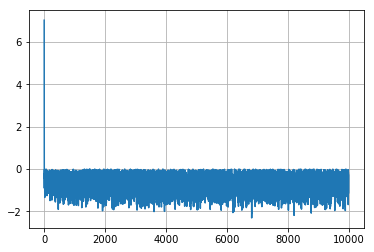

In [17]:
plt.plot(range(len(er_hist)),er_hist)
plt.grid()
plt.show()

---

In [18]:
o = Xp.dot(W)

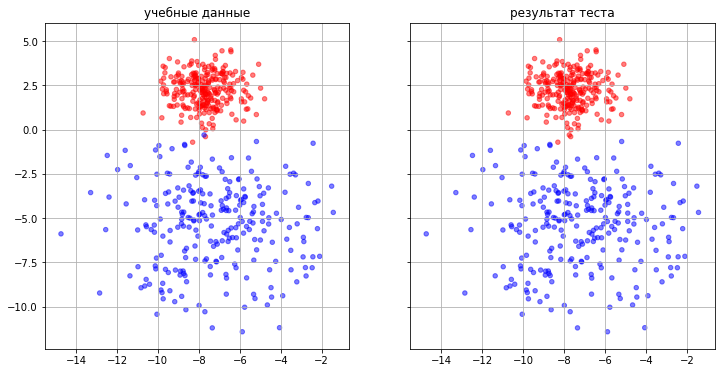

In [19]:
f, axarr = plt.subplots(1,2, sharex=True, sharey=True,figsize=(12,6),)
    
axarr[0].set_title('учебные данные')
axarr[0].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('результат теста')
axarr[1].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0.5) else 'r' for j in o ], 
             s=20,
             alpha=0.5 )
axarr[1].grid()

plt.show()
